In [23]:
# Les athlètes et leurs palmarès

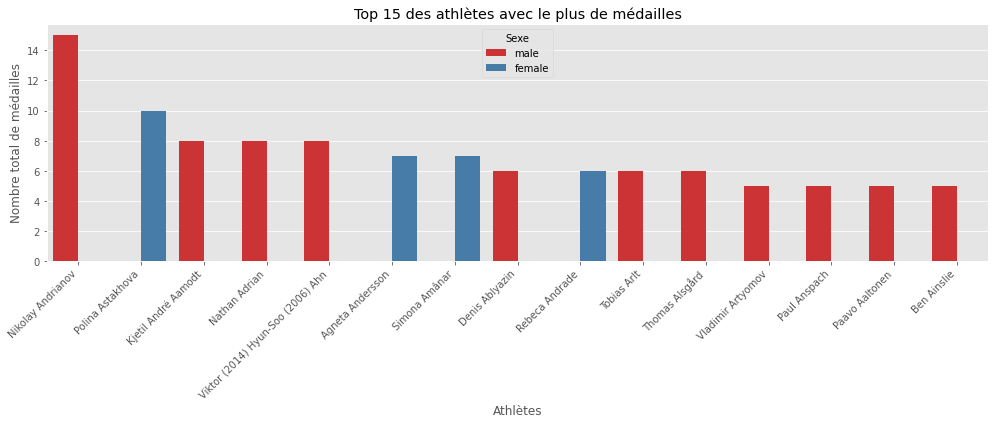

In [22]:

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the JSON file
file_path = "C:\\Users\\chris\\Downloads\\TP_Data_viz\\athletes_clean.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)


df = pd.DataFrame(data)

# Ensure medal counts are numeric
df[['or', 'argent', 'bronze']] = df[['or', 'argent', 'bronze']].apply(pd.to_numeric)

# Add total medals column
df['total_medailles'] = df['or'] + df['argent'] + df['bronze']

# Filter athletes with at least one medal
df_all_medals = df[df['total_medailles'] > 0].copy()

# Get top 15 athletes by total medals
top_15 = df_all_medals.sort_values(by='total_medailles', ascending=False).head(15)


plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_15,
    x='nom_complet',
    y='total_medailles',
    hue='sexe',
    palette='Set1'
)
plt.title("Top 15 des athlètes avec le plus de médailles")
plt.xlabel("Athlètes")
plt.ylabel("Nombre total de médailles")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexe')
plt.tight_layout()
plt.show()


In [21]:
# Les pays et le nombre de médaillés bronze, argent et or obtenu

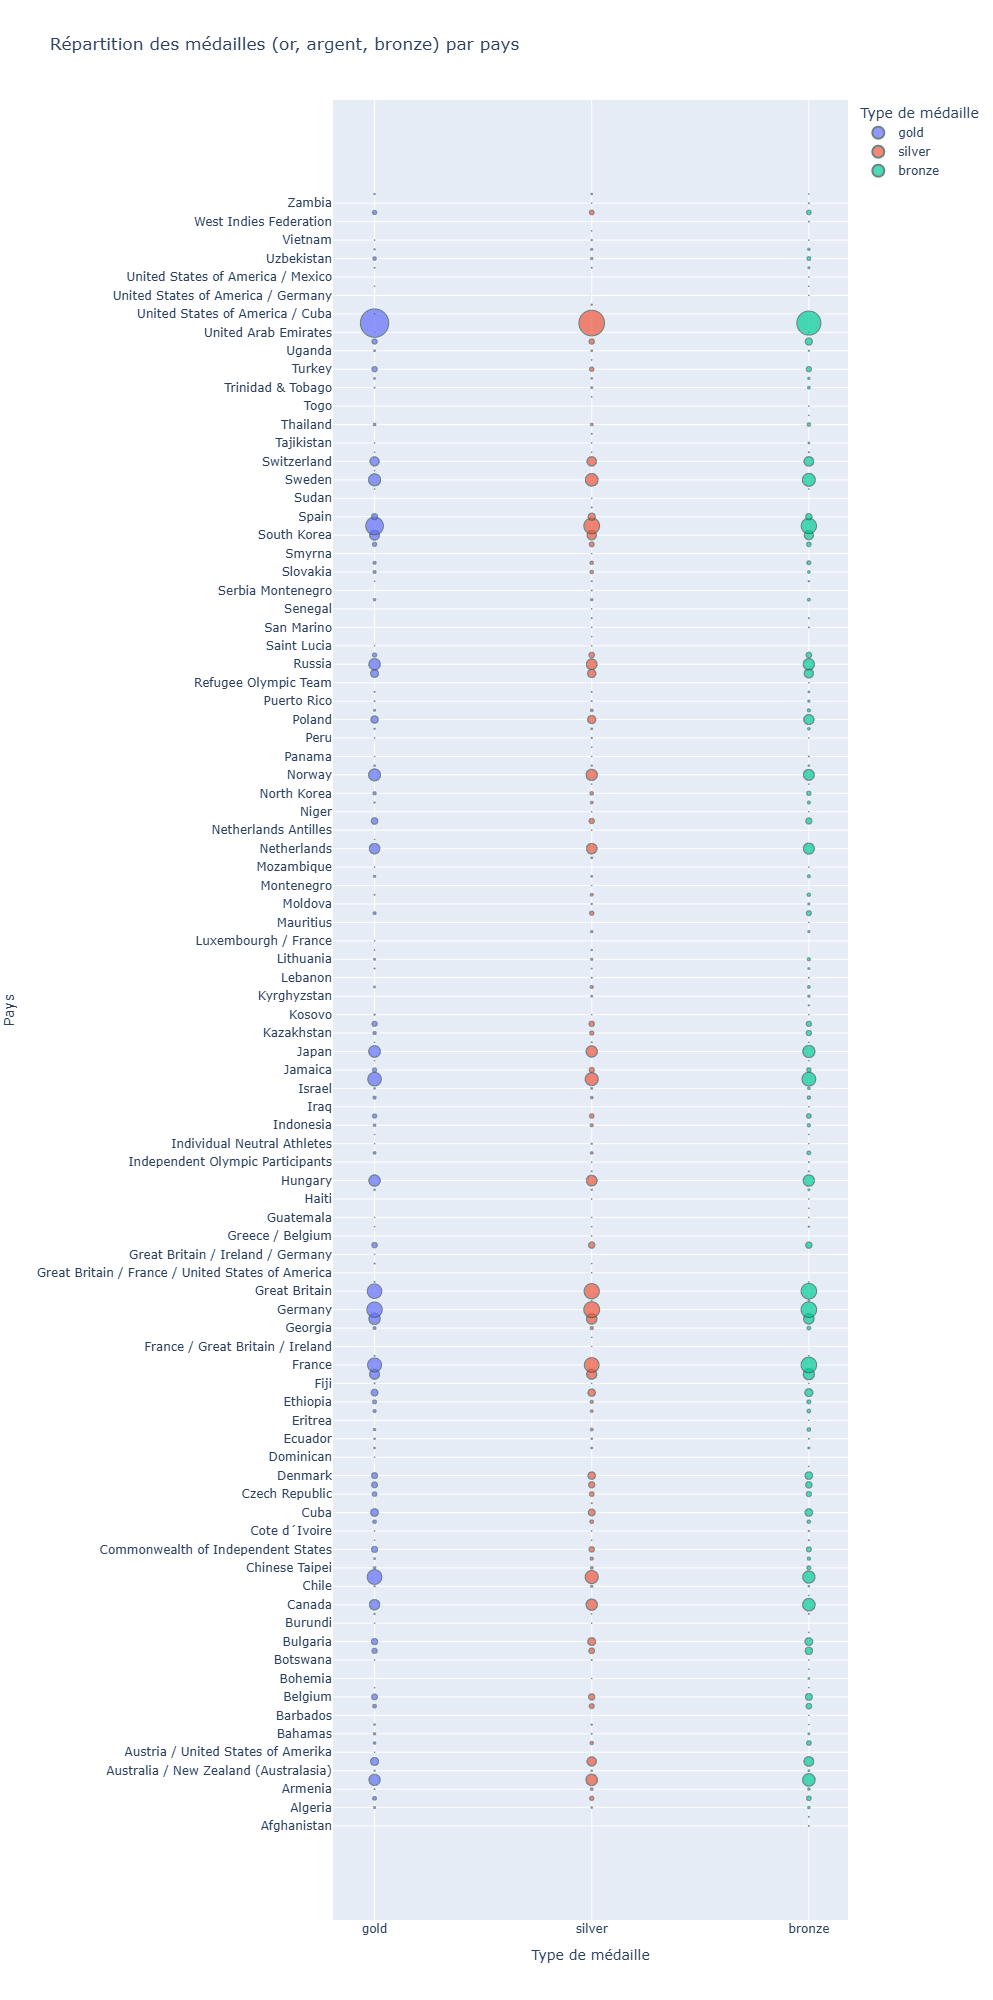

In [14]:
import plotly.express as px


medals_long = pd.melt(
    medals_df,
    id_vars=['nom'],
    value_vars=['gold', 'silver', 'bronze'],
    var_name='type_medaille',
    value_name='nombre'
)

# Bubble chart (scatter plot) - chaque point est une combinaison (pays, type de médaille)
fig = px.scatter(
    medals_long,
    x="type_medaille",
    y="nom",
    size="nombre",
    color="type_medaille",
    hover_name="nom",
    title="Répartition des médailles (or, argent, bronze) par pays",
    labels={"nom": "Pays", "type_medaille": "Type de médaille", "nombre": "Nombre de médailles"},
    height=2000
)

fig.update_traces(marker=dict(sizemode='area', line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.show()


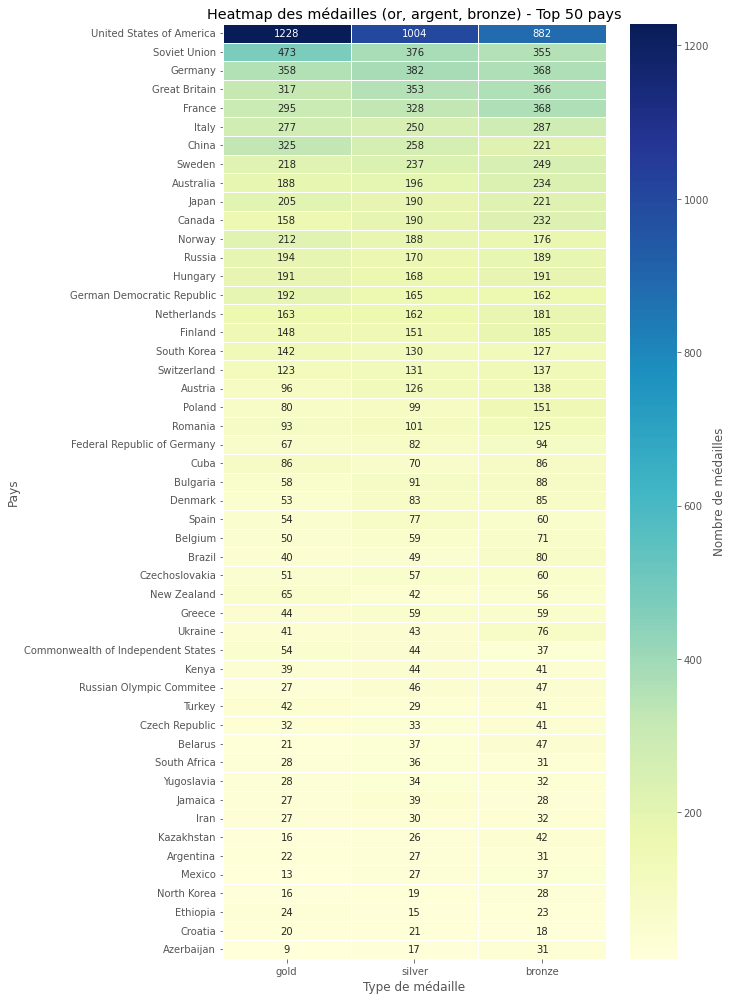

In [18]:
import matplotlib.pyplot as plt


heatmap_data = medals_df.set_index('nom')[['gold', 'silver', 'bronze']]

# Tri par nombre total décroissant
heatmap_data['total'] = heatmap_data.sum(axis=1)
heatmap_data = heatmap_data.sort_values(by='total', ascending=False).drop(columns='total')

# Limiter à 50 pays les plus médaillés pour lisibilité
heatmap_data = heatmap_data.head(50)

# Création de la heatmap
plt.figure(figsize=(10, 14))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Nombre de médailles'}
)
plt.title("Heatmap des médailles (or, argent, bronze) - Top 50 pays")
plt.xlabel("Type de médaille")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()


In [24]:
# Les sports avec le nombre de médailles bronze, argent et or obtenu par pays

C:\Users\chris\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\chris\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



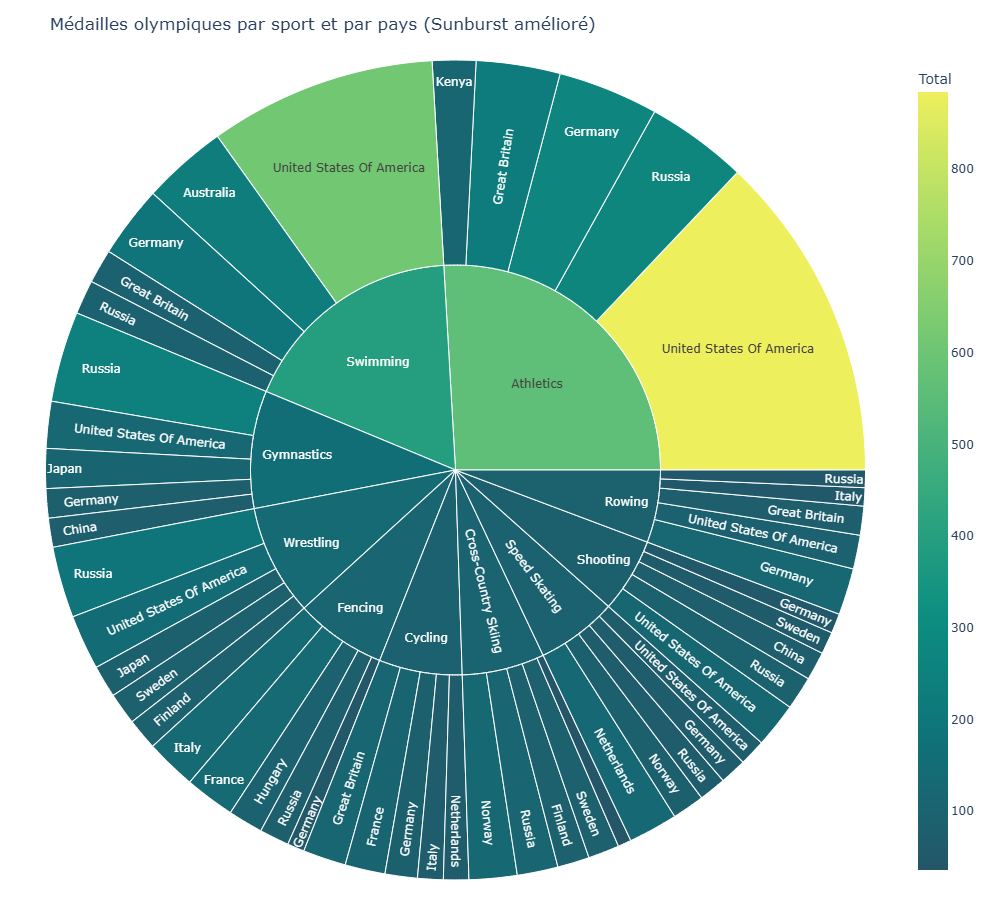

In [33]:
import json
import pandas as pd
import plotly.express as px

# Charger les données
with open('sports_medals_clean.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Transformer les données
medals_data = []
for sport in data:
    sport_name = sport['nom']
    for nation in sport['nations']:
        country_name = nation['nom'].split('\n')[0]
        medals_data.append({
            'Sport': sport_name,
            'Pays': country_name,
            'Or': nation['or'],
            'Argent': nation['argent'],
            'Bronze': nation['bronze'],
            'Total': nation['total']
        })

df = pd.DataFrame(medals_data)

# Filtrer pour plus de lisibilité : top 10 sports et top 5 pays par sport
top_sports = df.groupby('Sport')['Total'].sum().nlargest(10).index
df_top = df[df['Sport'].isin(top_sports)]

# Pour chaque sport, ne garder que les 5 meilleurs pays
df_filtered = df_top.groupby('Sport').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)


fig = px.sunburst(
    df_filtered,
    path=['Sport', 'Pays'],
    values='Total',
    color='Total',
    color_continuous_scale='Aggrnyl',
    title='Médailles olympiques par sport et par pays (Sunburst amélioré)',
    hover_data={'Or': True, 'Argent': True, 'Bronze': True, 'Total': True}
)

fig.update_layout(
    width=1000,
    height=900,
    margin=dict(t=60, l=20, r=20, b=20),
    uniformtext=dict(minsize=12, mode='hide')
)


fig.show()
